# PFDA Project

### by E. Qejvani
***

## Part 1 - Preparing the dataset.
***

* Uploading the libraries.
* Keeping the information we are interested in.
* Preparing the dataset for analyzing.
    - Checking data types of the coulumns.
    - Checking for empty value cells or NaN value cells.
    - Cleaning the dataset.

In [107]:
# Importing the libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import matplotlib.patches as patches
# Importing project_functions file where I'm storing all the functions to use in this project. 
from project_functions import *         

In [108]:
# Uploading the dataset to my data frame, skipping the first 23 rows as the dataset starts at row 24. 
# Setting low_memory=False - easier to upload in big datasets.
df = pd.read_csv('./data/data_valentia_updated.csv', skiprows=23, low_memory=False)

# Creating a subset using only the data I need for this project.
# Two ways of doing it:
df_valentia = df[['date', 'rain', 'temp', 'vappr', 'msl', 'wdsp', 'wddir']].copy() # easier
# or:
# df_valentia = df.drop(columns=['ww', 'sun', 'w', 'vis', 'clht', 'clamt', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4']) 

df_valentia.head(5)

,date,rain,temp,vappr,msl,wdsp,wddir
0,01-jan-1945 00:00,0.0,8.9,11.3,1037.2,3,350
1,01-jan-1945 01:00,0.0,8.5,10.8,1037.2,2,360
2,01-jan-1945 02:00,0.0,8.8,10.6,1037.3,6,10
3,01-jan-1945 03:00,0.0,8.9,10.6,1037.5,9,350
4,01-jan-1945 04:00,0.0,9.3,10.8,1037.6,9,350


### Checking the dataset.

In [109]:
# Information about our dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701280 entries, 0 to 701279
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    701280 non-null  object
 1   rain    701280 non-null  object
 2   temp    701280 non-null  object
 3   vappr   701280 non-null  object
 4   msl     701280 non-null  object
 5   wdsp    701280 non-null  object
 6   wddir   701280 non-null  object
dtypes: object(7)
memory usage: 37.5+ MB


### Changing the data types in my dataset.

As we can see from the above all data types in the dataset are object type. To change this I am going to:
- Change the date column type to date type data.
- Change the rest of the columns to float type data. 
- I’m converting the data type of my columns to `float32` to reduce memory usage, as my dataset is quite large.
- I’m creating a function for these changes in the `project_functions.py` file, which will also serve as a repository for all the functions used in my project.
- I am setting the `date` column as the index to make it easier to work with the data based on time, like sorting or grouping by dates.

In [110]:
# Columns_to_convert will pass to `convert_columns_to_float` function all columns that need to change to numeric data.  
columns_to_convert = ['rain', 'temp', 'vappr', 'msl', 'wdsp', 'wddir']
df_valentia = convert_columns_to_float(df_valentia, columns_to_convert)
df_valentia['date'] = pd.to_datetime(df_valentia['date'], format="%d-%b-%Y %H:%M", errors='coerce')
# Setting the date as index
df_valentia.set_index('date', inplace=True)

In [111]:
# With the `.info` command I am checking that the changes took effect.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    701238 non-null  float32
 1   temp    701220 non-null  float32
 2   vappr   701220 non-null  float32
 3   msl     701220 non-null  float32
 4   wdsp    701235 non-null  float32
 5   wddir   701171 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


In [112]:
# Displaying the first three rows to check the structure and columns again in my dataset.
df_valentia.head(3)

,rain,temp,vappr,msl,wdsp,wddir
date,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,3.0,350.0
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,2.0,360.0
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,6.0,10.0


### Checking if any data is missing - NAN or null values.

In [113]:
# Checking for missing data.
# df_valentia.isnull().sum()
# df_valentia.isna().sum()
# (df_valentia == ' ').sum()

### Checking for single space values `' '`

In Assignment Six of this module, I found out that using `.isna()` and `.isnull()` alone is insufficient for cleaning the dataset. Sometimes, cells can contain an empty value represented by a single space (stored as a string). Therefore, in the next section, I will check for any cells that contain a single space as their value.

### Counting the rows that hold empty cells.

* I created a function in the `project_functions` file that counts all the rows that hold empty cells. 

In [114]:
# calling the funtion from the 'project_functions.py' file.
count_rows_with_empty_or_space_cells_detail(df_valentia)

Rows with 0 empty cells: 701104
Rows with 1 empty cells: 75
Rows with 2 empty cells: 41
Rows with 3 empty cells: 22
Rows with 4 empty cells: 37
Rows with 5 empty cells: 1
Total rows with at least one empty values: 176


176

### Cleaning the rows with empty cells.

* Because of the big size of the dataset (709320 records) I decided to remove all the rows that contain empty cells.
* The total records after removing 176 rows becomes 709144.

In [115]:
df_valentia_clean = remove_rows_with_missing_data(df_valentia)
df_valentia_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701104 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    701104 non-null  float32
 1   temp    701104 non-null  float32
 2   vappr   701104 non-null  float32
 3   msl     701104 non-null  float32
 4   wdsp    701104 non-null  float32
 5   wddir   701104 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


### Converting wind speed to metres per second.

To convert the wind speed (wdsp) from knots to metres per second, I will use the conversion factor of 1 knot = 0.51444 metres/second. In the dataset, wind speed is currently measured in knots, representing the speed of the wind in nautical miles per hour. For my analysis, I need the wind speed expressed in metres per second. To achieve this, I will create a new column in the df_valentia dataset to store the wind speed values converted to metres per second.

In [116]:
# Create a new column with the windspeed in metre/second
df_valentia['wdsp_m/s'] = (df_valentia['wdsp'] * 0.51444).round(2)

In [117]:
df_valentia.head()

,rain,temp,vappr,msl,wdsp,wddir,wdsp_m/s
date,,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,3.0,350.0,1.54
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,2.0,360.0,1.03
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,6.0,10.0,3.09
1945-01-01 03:00:00,0.0,8.9,10.6,1037.500000,9.0,350.0,4.63
1945-01-01 04:00:00,0.0,9.3,10.8,1037.599976,9.0,350.0,4.63


In [118]:
# I don't need any more the wind speed column in knot so I am removing it from the dataset.
df_valentia = df_valentia.drop(columns=['wdsp'])
df_valentia.head()

,rain,temp,vappr,msl,wddir,wdsp_m/s
date,,,,,,
1945-01-01 00:00:00,0.0,8.9,11.3,1037.199951,350.0,1.54
1945-01-01 01:00:00,0.0,8.5,10.8,1037.199951,360.0,1.03
1945-01-01 02:00:00,0.0,8.8,10.6,1037.300049,10.0,3.09
1945-01-01 03:00:00,0.0,8.9,10.6,1037.500000,350.0,4.63
1945-01-01 04:00:00,0.0,9.3,10.8,1037.599976,350.0,4.63


In [119]:
df_valentia.info()
df_valentia.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rain      701238 non-null  float32
 1   temp      701220 non-null  float32
 2   vappr     701220 non-null  float32
 3   msl       701220 non-null  float32
 4   wddir     701171 non-null  float32
 5   wdsp_m/s  701235 non-null  float32
dtypes: float32(6)
memory usage: 21.4 MB


Index(['rain', 'temp', 'vappr', 'msl', 'wddir', 'wdsp_m/s'], dtype='object')

***
## Part 2: Analysing and working with the dataset.
***

### Correlation between wind speed and other data

In the next part I am checking if there is any correlation between the windspeed and the other data in the dataset.

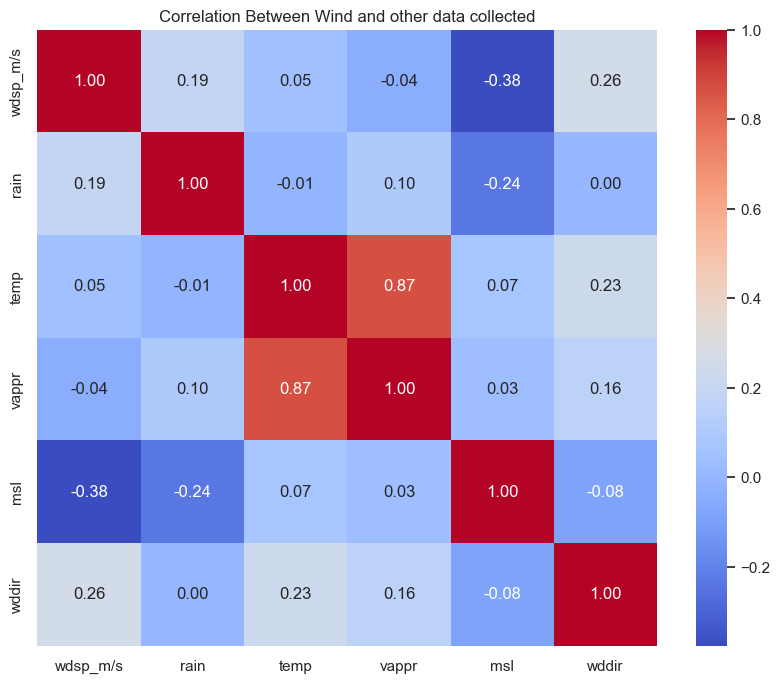

In [120]:
# Selecting columns to for correlation analysis between wind and other information we have.
selected_columns = ['wdsp_m/s','rain', 'temp', 'vappr', 'msl', 'wddir']
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Wind and other data collected')
plt.show()

### Deciding on which data to keep:

As we can see from the above, there is no direct connection between wind speed and the other data we currently have. 

In the next section, I will:

1. **Calculate the air density** and add it as a new column. The required data for this calculation includes:
   - Temperature (`temp`)
   - Vapour pressure (`vappr`)
   - Mean sea level pressure (`msl`)

2. **Calculate the power output** and add it as a new column. The required data for this calculation includes:
   - Air density (`air_density`)
   - Wind speed (`wdsp_m/s`)
   - Rotor swept area - calculated for a common wind turbine size with a diameter of 100 meters.
   - Power coefficient - typically ranging between 0.3 and 0.5. For this analysis, I used a value of 0.4.

3. **Remove unnecessary columns**, including:
   - Wind direction (`wddir`): While wind direction is crucial for energy output, modern wind turbines address this factor automatically. Their blades adjust dynamically to optimize wind capture regardless of direction, making this data redundant for my calculations.


### Calculating Air Density

To calculate the air density using the data available in my dataset I used the general air density formula derived from the _Ideal Gas Law_ for both dry air and water vapor: 

$$
\rho = \frac{p_d}{R_d T} + \frac{p_v}{R_v T}
$$

Where:

- $ \rho $: Air density in $ \text{kg/m}^3 $
- $ p_d $: Dry air pressure, calculated as $ p_d = \text{msl} - \text{vappr} $ (Pa)
- $ p_v $: Vapor pressure ($ \text{vappr} $) in Pascals (Pa)
- $ T $: Temperature in Kelvin (K), converted as:

  $$
  T_{\text{Kelvin}} = T_{\text{Celsius}} + 273.15
  $$

- $ R_d $: Specific gas constant for dry air (287.05 J/(kg·K))
- $ R_v $: Specific gas constant for water vapor (461.5 J/(kg·K))


There are two functions in my `project_functions.py` folder that deal with the calculations of air density in the project:
- `calculate_air_density`
- `add_new_column`

The ``add_new_column`, computes air density by internally calling the `calculate_air_density` function, which uses the formula provided above. After calculating air density, the `add_new_column` function removes unnecessary columns from the DataFrame to optimize memory usage.

In [121]:
# Making changes to the dataset by adding a new column
df_valentia = add_new_column(df_valentia, column='air_density')
# Checking if it works
df_valentia.head(5)

,rain,wddir,wdsp_m/s,air_density
date,,,,
1945-01-01 00:00:00,0.0,350.0,1.54,1.275812
1945-01-01 01:00:00,0.0,360.0,1.03,1.277857
1945-01-01 02:00:00,0.0,10.0,3.09,1.276715
1945-01-01 03:00:00,0.0,350.0,4.63,1.276509
1945-01-01 04:00:00,0.0,350.0,4.63,1.274731


In [122]:
# Information about the dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701280 entries, 1945-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rain         701238 non-null  float32
 1   wddir        701171 non-null  float32
 2   wdsp_m/s     701235 non-null  float32
 3   air_density  701220 non-null  float64
dtypes: float32(3), float64(1)
memory usage: 18.7 MB


In [123]:
# Checking the air density values: range, mean, std etc...
# Get summary statistics for the column
df_valentia['air_density'].describe()

count    701220.000000
mean          1.238746
std           0.023299
min           1.149262
25%           1.222175
50%           1.236376
75%           1.253361
max           1.347003
Name: air_density, dtype: float64

### Calculating energy power

The Sustainable Energy Authority of Ireland (SEAI) notes that in recent years, rotor diameters of 100 meters or more at hub heights exceeding 100 meters are common.
For this project I am going to calculate the output power using the diameter as 100m for my calculations and Power Coefficient(Efficiency) of 0.4.

The wind power equation is expressed as follows:

$$
P = 0.5 \times \rho \times A \times V^3 \times E
$$

Where:
- **P** = Power in Watts  
- **$\rho$** = Air Density in kg/m³ (about 1.225 kg/m³ at sea level, decreases with altitude)  
- **A** = Rotor Swept Area in m² = $\pi r^2$ (where $r$ = radius or blade length)  
- **V** = Wind Speed in m/s (cubed)  
- **E** = Efficiency (Power Coefficient, typically between 0.3 and 0.5)

In [124]:
# Making changes to the dataset by adding a new column 'power_output' 
df_valentia = add_new_column(df_valentia, column='power_kw')
# Checking if it works
df_valentia.head(5)

,rain,wdsp_m/s,air_density,power_kw
date,,,,
1945-01-01 00:00:00,0.0,1.54,1.275812,7.32
1945-01-01 01:00:00,0.0,1.03,1.277857,2.19
1945-01-01 02:00:00,0.0,3.09,1.276715,59.17
1945-01-01 03:00:00,0.0,4.63,1.276509,199.02
1945-01-01 04:00:00,0.0,4.63,1.274731,198.74


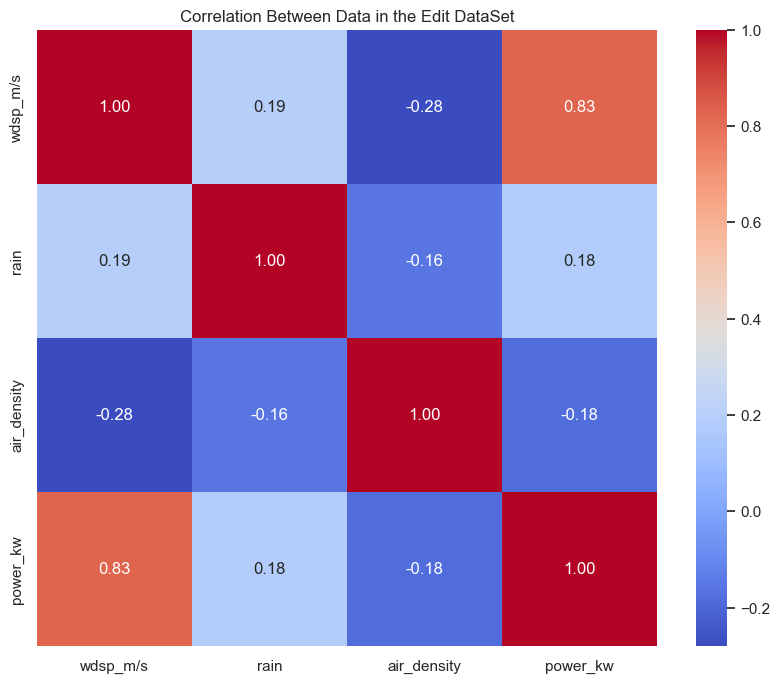

In [125]:
# Selecting columns to for correlation between the data in the df_valentia DataFrame
selected_columns = ['wdsp_m/s','rain', 'air_density', 'power_kw' ]
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Data in the Edit DataSet')
plt.show()

## Analyzing Data in Depth

### Calculation how many hours per day the wind speed is between 4m/s(cut-in speed for the turbines to start working) to 25m/s(cut-out speed).

In [126]:
df_working_valentia = df_valentia[(df_valentia['wdsp_m/s'] >= 4) & (df_valentia['wdsp_m/s'] <25)]

df_working_valentia

,rain,wdsp_m/s,air_density,power_kw
date,,,,
1945-01-01 03:00:00,0.0,4.63,1.276509,199.02
1945-01-01 04:00:00,0.0,4.63,1.274731,198.74
1945-01-01 05:00:00,0.0,4.12,1.274485,140.01
1945-01-02 11:00:00,0.0,5.14,1.275994,272.18
1945-01-02 12:00:00,0.0,6.17,1.273565,469.89
...,...,...,...,...
2024-12-31 17:00:00,1.2,6.69,1.234317,580.53
2024-12-31 18:00:00,1.8,5.66,1.235066,351.77
2024-12-31 19:00:00,1.8,4.63,1.235684,192.65


### Using .describe command to get statistics about data in the dataset and I will graph the results:

In [127]:
summary_stats = df_working_valentia[['rain', 'wdsp_m/s', 'air_density', 'power_kw']].describe()
summary_stats

,rain,wdsp_m/s,air_density,power_kw
count,445441.000000,445468.000000,445436.000000,445436.000000
mean,0.228013,6.995166,1.234415,939.175800
std,0.714139,2.451473,0.020962,1216.390641
min,0.000000,4.120000,1.149262,126.910000
25%,0.000000,5.140000,1.219457,262.230000
50%,0.000000,6.690000,1.232907,564.780000
75%,0.100000,8.230000,1.248191,1085.690000
max,36.200001,24.690001,1.334665,28606.730000


**Plotting summary statistics with log scale for y-axis**

The _power output_ value is too big comparing to other data in the dataset so I am using log scale measuring for y-axis.

<Figure size 800x600 with 0 Axes>

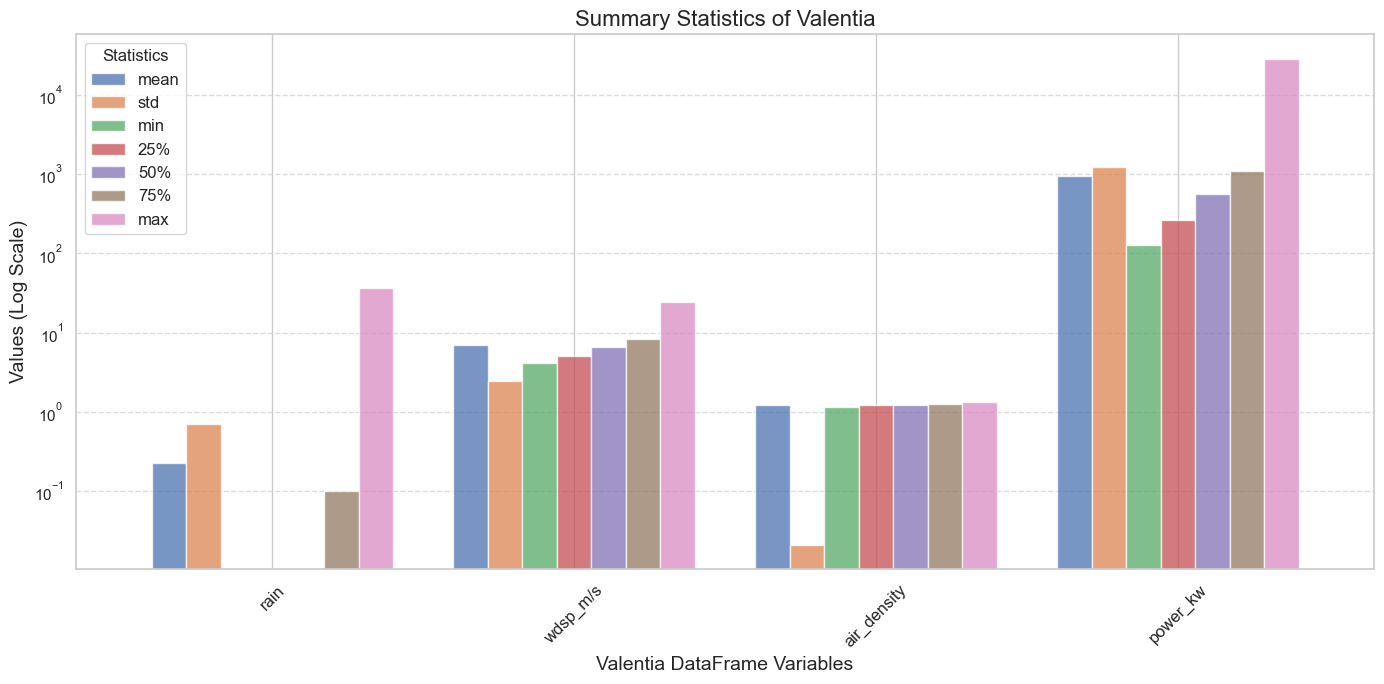

In [128]:
# Transpose for easier plotting (columns become rows)
summary_stats = summary_stats.transpose()

# Set figure size.
plt.figure(figsize=(8, 6))

# Bar plot for mean, min, max
summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].plot(kind='bar', figsize=(14, 7), width=0.8, alpha=0.75)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Adding labels and title
plt.title('Summary Statistics of Valentia', fontsize=16)
plt.ylabel('Values (Log Scale)', fontsize=14)
plt.xlabel('Valentia DataFrame Variables', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Statistics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [129]:
# Count the number of occurrences (hours) per day
hours_per_day = group_by_dataset(df_working_valentia, time='D')
hours_per_day

date
1945-01-01     3
1945-01-02    13
1945-01-03    24
1945-01-04    24
1945-01-05    20
              ..
2024-12-28     1
2024-12-29    14
2024-12-30    24
2024-12-31    21
2025-01-01     1
Freq: D, Length: 29221, dtype: int64

In [130]:
hours_per_week = group_by_dataset(df_working_valentia, time='W')
hours_per_week

date
1945-01-07    119
1945-01-14    129
1945-01-21    120
1945-01-28     93
1945-02-04    149
             ... 
2024-12-08    127
2024-12-15     53
2024-12-22    159
2024-12-29     73
2025-01-05     46
Freq: W-SUN, Length: 4175, dtype: int64

In [131]:
hours_per_month = group_by_dataset(df_working_valentia, time='ME')
hours_per_month

date
1945-01-31    533
1945-02-28    598
1945-03-31    511
1945-04-30    539
1945-05-31    561
             ... 
2024-09-30    375
2024-10-31    433
2024-11-30    353
2024-12-31    479
2025-01-31      1
Freq: ME, Length: 961, dtype: int64

In [132]:
hours_per_year = group_by_dataset(df_working_valentia, time='YE')
hours_per_year

date
1945-12-31    6147
1946-12-31    6275
1947-12-31    6085
1948-12-31    6393
1949-12-31    5996
              ... 
2021-12-31    4723
2022-12-31    5124
2023-12-31    5417
2024-12-31    5240
2025-12-31       1
Freq: YE-DEC, Length: 81, dtype: int64

In [133]:
hours_per_decade = group_by_dataset(df_working_valentia, time='decade')
hours_per_decade

decade
1940    30896
1950    54868
1960    58715
1970    59537
1980    61111
1990    51693
2000    50417
2010    52178
2020    26053
dtype: int64

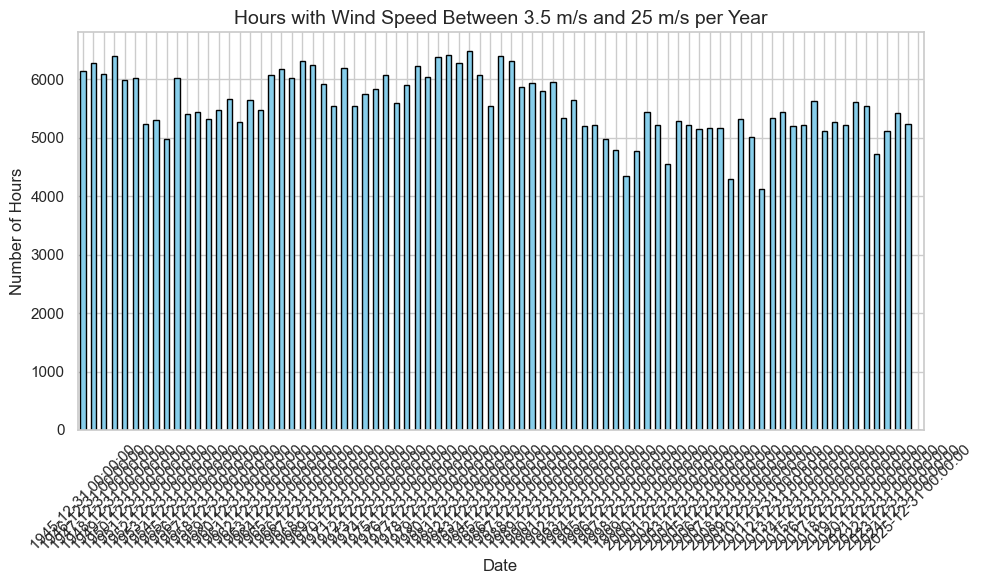

In [134]:
# Plot the data
plt.figure(figsize=(10, 6))  # Optional: specify the figure size
hours_per_year.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar chart for daily hours

# Set the title and labels
plt.title('Hours with Wind Speed Between 3.5 m/s and 25 m/s per Year', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Optional: adjust layout to make it look better
plt.show()


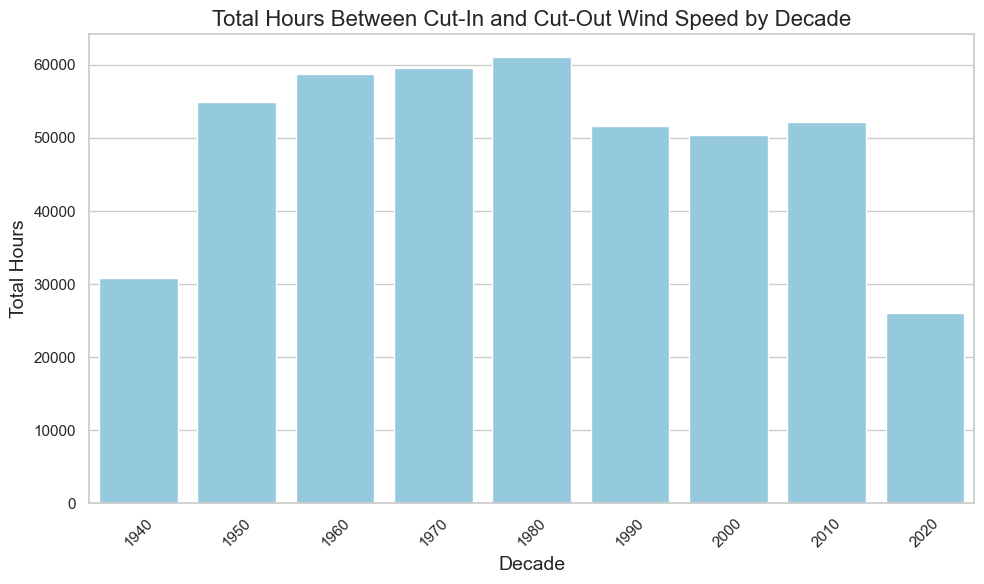

In [135]:
# Plot the data by decade using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hours_per_decade.index, y=hours_per_decade.values, color='skyblue')

# Customize the plot with title and labels
plt.title('Total Hours Between Cut-In and Cut-Out Wind Speed by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Hours', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [136]:
df_optimal_valentia = df_valentia[(df_valentia['wdsp_m/s'] >= 14) & (df_valentia['wdsp_m/s'] < 25)]
df_optimal_valentia

,rain,wdsp_m/s,air_density,power_kw
date,,,,
1945-01-04 12:00:00,0.3,15.43,1.291269,7451.34
1945-01-12 18:00:00,0.0,17.49,1.293049,10866.86
1945-01-12 20:00:00,0.0,14.92,1.295802,6760.28
1945-01-12 23:00:00,0.0,14.40,1.293924,6068.99
1945-01-18 07:00:00,0.0,14.92,1.209742,6311.31
...,...,...,...,...
2024-12-07 03:00:00,0.0,14.92,1.246383,6502.47
2024-12-07 09:00:00,0.0,14.40,1.255788,5890.11
2024-12-22 00:00:00,0.1,14.40,1.253497,5879.37


In [137]:
best_hours_per_year = group_by_dataset(df_optimal_valentia, time='YE')
best_hours_per_year

date
1945-12-31     81
1946-12-31     72
1947-12-31    148
1948-12-31    101
1949-12-31     66
             ... 
2020-12-31     76
2021-12-31     38
2022-12-31     36
2023-12-31     23
2024-12-31     47
Freq: YE-DEC, Length: 80, dtype: int64

In [138]:
# Calculate the percentage of the year
best_percentage_of_year = (best_hours_per_year / total_hours_in_year) * 100
best_percentage_of_year

date
1945-12-31    0.924658
1946-12-31    0.821918
1947-12-31    1.689498
1948-12-31    1.152968
1949-12-31    0.753425
                ...   
2020-12-31    0.867580
2021-12-31    0.433790
2022-12-31    0.410959
2023-12-31    0.262557
2024-12-31    0.536530
Freq: YE-DEC, Length: 80, dtype: float64

**analysis by season**

In [139]:
# Extract additional time-based features from the index (date is set as DataFrame index)
df_working_valentia = df_working_valentia.copy()
df_working_valentia.loc[:, 'year'] = df_working_valentia.index.year
df_working_valentia.loc[:, 'month'] = df_working_valentia.index.month
df_working_valentia.loc[:, 'season'] = df_working_valentia.index.month % 12 // 3 + 1

In [ ]:
# Define a function to label seasons more clearly based on the Irish Season.
def get_season(month):
    if month in [11, 12, 1]:
        return 'Winter'
    elif month in [2, 3, 4]:
        return 'Spring'
    elif month in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Fall'

df_working_valentia['season_label'] = df_working_valentia['month'].apply(get_season)

# Group data by season and calculate averages for our numerical data.
seasonal_averages = df_working_valentia.groupby('season_label').mean()

print(seasonal_averages[['rain', 'wdsp_m/s', 'air_density', 'power_kw']])


                  rain  wdsp_m/s  air_density     power_kw
season_label                                              
Fall          0.248933  6.602692     1.220565   752.863680
Spring        0.201690  7.277646     1.246018  1063.455263
Summer        0.165814  6.262440     1.226397   608.774151
Winter        0.287106  7.686180     1.242223  1261.610489


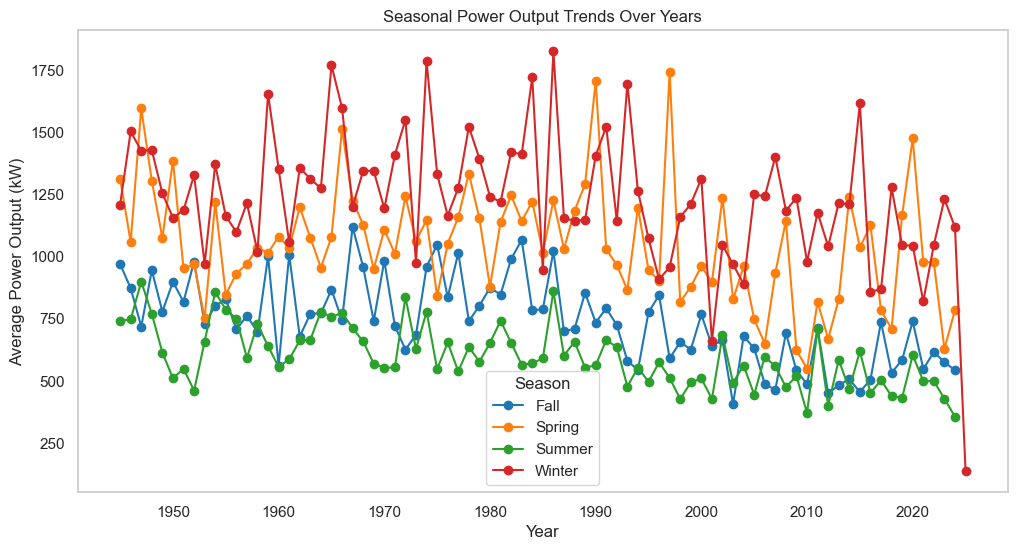

In [141]:
# Group power output by season and year
seasonal_trends = df_working_valentia.groupby(['year', 'season_label'])['power_kw'].mean().unstack()

# Setting colors for the seasons
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example: blue, orange, green, red

# Plot data for the seasons.
seasonal_trends.plot(figsize=(12, 6), marker='o', color=colors)
plt.title('Seasonal Power Output Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Power Output (kW)')
plt.legend(title='Season')
plt.grid()
plt.show()
